In [1]:
import pandas as pd
import csv
import sympy as sp
import numpy as np
import random
import matplotlib.pyplot as plt

def white_noise(mu, sigma):

    data = np.random.randn(100000) * sigma + mu
    result = random.choice(data)
    return result

def discrete_delta(t):
    result = 0
    if t ==50:
        result = 1 
    else:
        result = 0
    return result

#actual params
a = -0.8
b = 0.5
theta_hat_0 = np.array([0,0])
theta_0 = np.array([a, b])
P0 = 100*np.identity(2)
sigma = 0.5
Y0 = np.array([0,0]) @ theta_0 + white_noise(0, sigma)
#use from example

#Y0 = 0.3396

#input signal
t0 = 0
sample_depth = 1000


In [2]:
u_t = []
for i in range(0, sample_depth+1):
    u_t.append(discrete_delta(i))
    
P = [P0]
Y = [Y0]
PHI = []
theta_hat = [theta_hat_0]
a_hat = []
b_hat = []
time = []
for k in range(1,sample_depth):
    phi = np.array([-Y[k-1], u_t[k-1]])
    PHI.append(phi.T)
    Y.append(phi.T @ theta_0 + white_noise(0, sigma))
    try:
        P_k = np.linalg.inv(np.array(PHI).T @ np.array(PHI))
    except:
        #for some reason its singular at k=1, but good at every other index
        #can change P_k to whatever 2x2 matrix and it always converges
        P_k = np.identity(2)
       
   # P_k = np.linalg.inv(np.array(PHI).T @ np.array(PHI))
    P.append(P_k)
    
    K = P[k] @ phi
    theta_hat_k = theta_hat[k-1] + K*(Y[k] - phi.T @ theta_hat[k-1])
    theta_hat.append(theta_hat_k)
    
    a_hat.append(theta_hat[k][0])
    b_hat.append(theta_hat[k][1])
    time.append(k)
print("last 5 a_hat values:")
print(a_hat[995:])
print(" ")
print("last 5 b_hat values:")
print(b_hat[995:])

last 5 a_hat values:
[-0.8095400001962111, -0.809493762910467, -0.809493740376506, -0.8094831939916729]
 
last 5 b_hat values:
[0.9059721735484245, 0.9059706587889691, 0.9059706580507438, 0.9059703125452522]


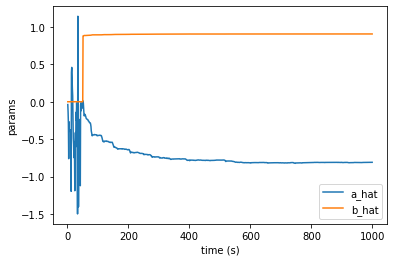

In [3]:
plt.plot(time,a_hat, label = "a_hat")
plt.plot(time,b_hat, label = "b_hat")

plt.xlabel("time (s)")
plt.ylabel("params")
plt.legend()

plt.show()
